In [1]:
from keras import layers
from keras import models
from keras import optimizers
from keras import regularizers
import matplotlib.pyplot as plt
import os
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16

Using TensorFlow backend.


In [2]:
data_path = 'C:\\Users\\Anton.Lahunou\\detect_people_task\\inria_brainwash'

In [3]:
datagen = ImageDataGenerator(rescale=1./255)

In [4]:
generator = datagen.flow_from_directory(data_path, target_size=(150, 150), batch_size=3000, shuffle=True, class_mode='binary')

Found 3000 images belonging to 2 classes.


In [5]:
for data_batch, labels_batch in generator:
    images = data_batch
    labels = labels_batch
    break

In [6]:
k = 6
samples = len(images) // k

In [7]:
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

In [8]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [9]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=2e-5), metrics=['acc'])

In [11]:
train_data = images[samples:]
train_targets = labels[samples:]
test_data = images[:samples]
test_targets = labels[:samples]
history = model.fit(train_data, train_targets, epochs=32, batch_size=64, validation_split=0.2)
results = model.evaluate(test_data, test_targets)

Train on 2000 samples, validate on 500 samples
Epoch 1/32
2000/2000 [==============================] - 1653s 826ms/step - loss: 0.2311 - acc: 0.9175 - val_loss: 0.2846 - val_acc: 0.8760
Epoch 2/32
2000/2000 [==============================] - 1643s 822ms/step - loss: 0.0989 - acc: 0.9660 - val_loss: 0.1080 - val_acc: 0.9600
Epoch 3/32
2000/2000 [==============================] - 1641s 820ms/step - loss: 0.0620 - acc: 0.9740 - val_loss: 0.1447 - val_acc: 0.9580
Epoch 4/32
2000/2000 [==============================] - 1698s 849ms/step - loss: 0.0822 - acc: 0.9750 - val_loss: 0.1984 - val_acc: 0.9480
Epoch 5/32
2000/2000 [==============================] - 1666s 833ms/step - loss: 0.0750 - acc: 0.9830 - val_loss: 0.3116 - val_acc: 0.9080
Epoch 6/32
2000/2000 [==============================] - 1630s 815ms/step - loss: 0.0631 - acc: 0.9795 - val_loss: 0.0764 - val_acc: 0.9700
Epoch 7/32
2000/2000 [==============================] - 1626s 813ms/step - loss: 0.1433 - acc: 0.9715 - val_loss: 0.242

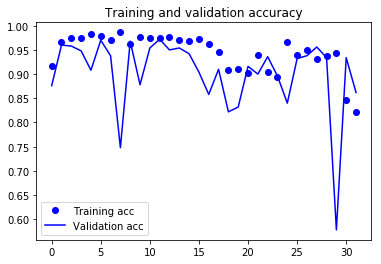

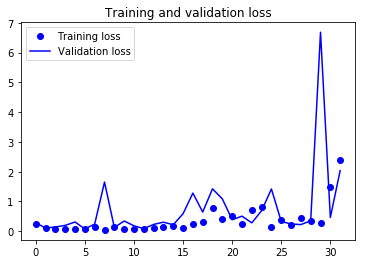

In [12]:
plt.plot(history.history['acc'], 'bo', label='Training acc')
plt.plot(history.history['val_acc'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(history.history['loss'], 'bo', label='Training loss')
plt.plot(history.history['val_loss'], 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [13]:
results

[2.437997673034668, 0.8320000004768372]

In [14]:
model.save('model4.h5')